# Plot graphs automatically
by Yuhang Lin

In [1]:
%matplotlib inline
from __future__ import print_function
from getcpuinfo import cpuinfo
import numpy as np
import matplotlib.pyplot as plt
from apscheduler.schedulers.background import BackgroundScheduler
import time

In [2]:
# keep a window with the last 50 points
window = 50
data = []
num_container = 5
for i in range(num_container):
    data.append([])

In [3]:
def get_data():
    cpu_data = cpuinfo()
    for i in range(num_container):
        if len(data[i]) >= window:
            # drop the oldest point 
            data[i].pop(0)
        data[i].append(cpu_data[i])

In [4]:
sched = BackgroundScheduler()
# data is retrieved every 1 second
sched.add_job(get_data, 'interval', seconds=1)
sched.start()

In [5]:
def plot_cpu():
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    t = np.arange(0.01, 50, 1)

    ax1 = plt.subplot(511)
    plt.plot(t, data[0]) # container 0
    plt.setp(ax1.get_xticklabels(), fontsize=6)

    # share x only
    ax2 = plt.subplot(512, sharex=ax1)
    plt.plot(t, data[1]) # container 1
    # make these tick labels invisible
    plt.setp(ax2.get_xticklabels(), visible=False)

    ax3 = plt.subplot(513, sharex=ax1)
    plt.plot(t, data[2]) # cotainer 2
    ax4 = plt.subplot(514, sharex=ax1)
    plt.plot(t, data[3]) # cotainer 3
    ax5 = plt.subplot(515, sharex=ax1)
    plt.plot(t, data[4]) # cotainer 4
    
    plt.xlim(0.01, 50)
    plt.show()

In [6]:
time.sleep(53)
len(data[1])

50

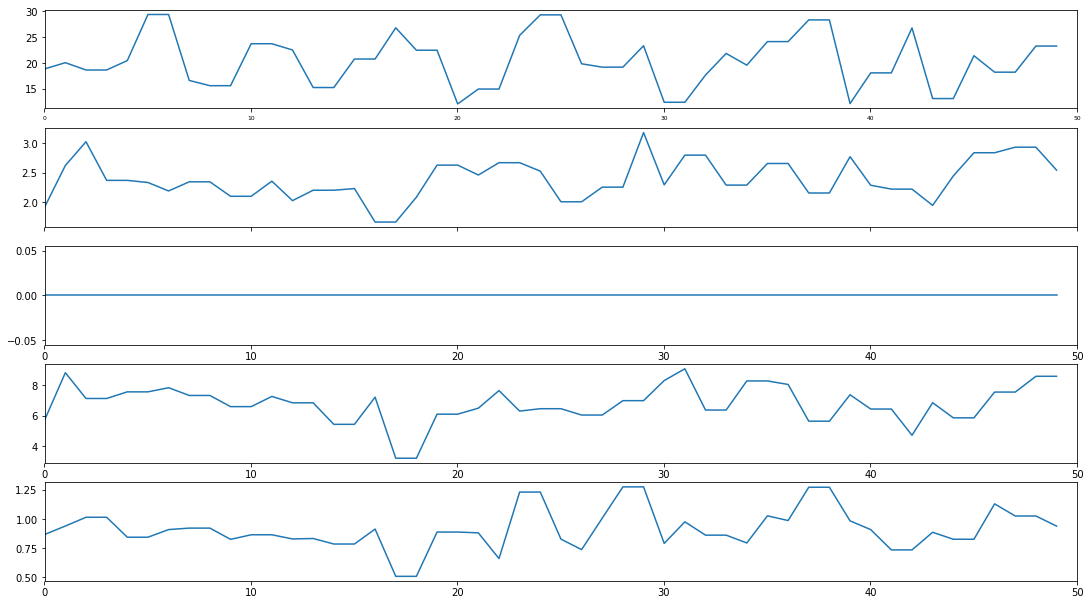

In [7]:
plot_cpu()

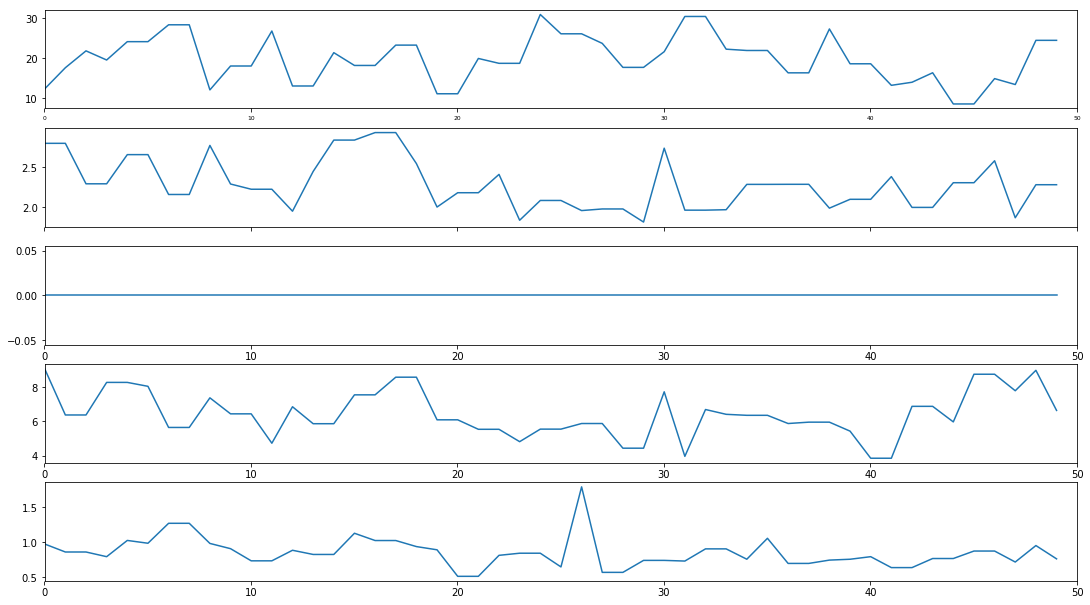

In [8]:
time.sleep(30)
plot_cpu()

In [9]:
data[4]

[0.9743039,
 0.8596077,
 0.8596077,
 0.7923042,
 1.0257805,
 0.9854061,
 1.2719982,
 1.2719982,
 0.9826711,
 0.9073602,
 0.7327005,
 0.7327005,
 0.8844597,
 0.8243102,
 0.8243102,
 1.1289337,
 1.0243992,
 1.0243992,
 0.9374948,
 0.8910671,
 0.5099871,
 0.5099871,
 0.8116357,
 0.8421704,
 0.8421704,
 0.6451794,
 1.7955901,
 0.5668881,
 0.5668881,
 0.7390532,
 0.7390532,
 0.729437,
 0.9045168,
 0.9045168,
 0.7558456,
 1.0564766,
 0.6954367,
 0.6954367,
 0.7431006,
 0.7554279,
 0.7923944,
 0.6353747,
 0.6353747,
 0.7659412,
 0.7659412,
 0.8732948,
 0.8732948,
 0.7155632,
 0.9521036,
 0.7610229]

In [10]:
time.sleep(10)
sched.shutdown() # shutdown the scheduler